![СамГТУ](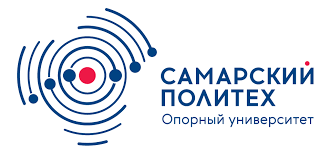 "СамГТУ") 
<p style = 'text-align: center'>
МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РОССИЙСКОЙ ФЕДЕРАЦИИ<br>
Федеральное государственное бюджетное образовательное учреждение высшего образования<br>
«Самарский государственный технический университет»<br>
(ФГБОУ ВО «СамГТУ»)<br>
Институт автоматики и информационных технологий<br>
Кафедра "Вычислительная техника"</p><br><br><br><br><br><br>
<h3 style = 'text-align: center'> Отчёт о выполнении лабораторной работы №6<br></h3>
<h3 style = 'text-align: center'> По дисциплине "Технологии мультисервисных сетей"<br></h3>
<h3 style = 'text-align: center'> На тему "Работа с файлами в Google Colab"<br></h3><br><br><br><br><br><br>
<p style = 'text-align: right'>
Проверил: профессор, д.т.н. Гавлиевский С. Л.<br><br>
Выполнили: студенты 2-ИАИТ-21ИАИТ-103М<br>
Павлов А. С.<br>
Рындина М. С.<br>
Баранов А. С.<br>
Емелина А. А.<br><br><br>
</p>
<p style = 'text-align: center'>
Самара 2022<br><br><br>
</p>

## Работа с файлами в Google Colab

### Этап 1. Подгрузка файлов

Способ 1. Вручную через вкладку 'Файлы'

In [ ]:
# см. материалы урока на сайте

Способ 2. Через модуль files библиотеки google.colab

In [1]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

In [2]:
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
# посмотрим на содержимое словаря uploaded
uploaded

{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

### Этап 2. Чтение файлов

#### Просмотр содержание папки /content/

##### Модуль os и метод .walk()

In [4]:
# импортируем модуль os
import os

# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):
  
  # во вложенном цикле проходимся по названиям файлов
  for filename in filenames:

    # и соединяем путь до папок и входящие в эти папки файлы
    # с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/test.csv
/content/train.csv
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/logs/2022.12.12/14.34.18.132328.log
/content/.config/logs/2022.12.12/14.33.52.591463.log
/content/.config/logs/2022.12.12/14.34.45.274660.log
/content/.config/logs/2022.12.12/14.35.22.828834.log
/content/.config/logs/2022.12.12/14.34.53.540120.log
/content/.config/logs/2022.12.12/14.35.22.012603.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


##### Команда `!ls`

In [5]:
# посмотрим на содержимое папки content
!ls

sample_data  test.csv  train.csv


In [6]:
# заглянем внутрь sample_data
!ls /content/sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


#### Чтение из переменной uploaded

In [7]:
# посмотрим на тип значений словаря uploaded
type(uploaded['test.csv'])

bytes

Пример работы с объектом bytes

In [8]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['test.csv'].decode()

# на выходе получаем обычную строку
print(type(uploaded_str))

<class 'str'>


In [9]:
# выведем первые 35 значений
print(uploaded_str[:35])

PassengerId,Pclass,Name,Sex,Age,Sib


In [10]:
# если разбить строку методом .split() по символам \r (возврат к началу строки) и \n (новая строка)
uploaded_list = uploaded_str.split('\r\n')

# на выходе мы получим список
type(uploaded_list)

list

In [11]:
# пройдемся по этому списку, не забыв создать индекс с помощью функции enumerate()
for i, line in enumerate(uploaded_list):

  # начнем выводить записи
  print(line)

  # когда дойдем до четвертой строки
  if i == 3:

    # прервемся
    break

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


#### Использование функции open() и конструкции with open()

In [12]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/train.csv', 'r')

# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))

# в конце файл необходимо закрыть
f1.close()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S



In [13]:
# снова откроем файл
f2 = open('/content/train.csv', 'r')

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):

    # выведем строки без служебных символов по краям
    print(line.strip())
    
    # дойдя до четвертой строки, прервемся
    if i == 3:
      break

# не забудем закрыть файл
f2.close()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S


In [14]:
# скажем Питону: "открой файл  и назови его f3"
with open('/content/test.csv', 'r') as f3:

  # "пройдись по строкам без служебных символов"
  for i, line in enumerate(f3):
    print(line.strip())
    
    # и "прервись на четвертой строке"
    if i == 3:
      break

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


#### Чтение через библиотеку Pandas

In [15]:
# импортируем библиотеку
import pandas as pd

# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Этап 3. Построение модели и прогноз

#### **Шаг 1**. Обработка и анализ данных

Исследовательский анализ данных (EDA)

In [17]:
# посмотрим на данные в целом
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

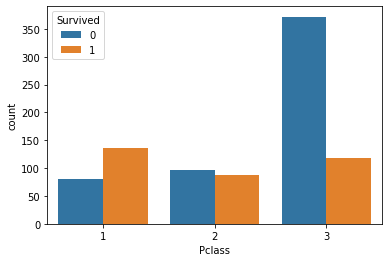

In [19]:
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

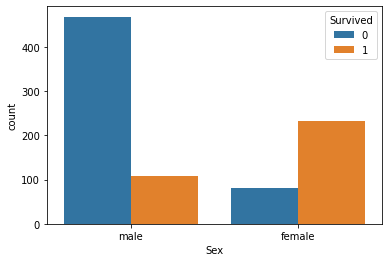

In [20]:
# кто выживал чаще, мужчины или женщины?
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

Пропущенные значения

In [21]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis = 1 отвечает за столбцы, inplace = True сохраняет изменения)
train.drop(columns = 'Cabin', axis = 1, inplace = True)

In [23]:
# а вот Age (возраст) скорее важен, заменим пустые значения средним арифметическим
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [24]:
# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace = True)

In [25]:
# посмотрим на результат
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Категориальные переменные

In [26]:
# применим one-hot encoding к переменной Sex (пол) с помощью метода .get_dummies()
pd.get_dummies(train['Sex']).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [27]:
# удалим первый столбец, он избыточен
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(3)

,male
0,1
1,0
2,0


In [28]:
# сделаем то же самое для переменных Embarked и Pclass
embarked = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)

In [29]:
# присоединим закодированные через one-hot encoding переменные
# к исходному датафрейму через функцию .concat()
train = pd.concat([train, pclass, sex, embarked], axis = 1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1


Отбор признаков

In [30]:
# удалим те столбцы, которые нам теперь не нужны
train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1


Нормализация данных

In [31]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Age', 'Fare']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,0,1,1,0,1
1,1,0.643971,1,0,0.788947,0,0,0,0,0
2,1,-0.281878,0,0,-0.486650,0,1,0,0,1


In [32]:
# некоторые названия столбцов теперь представляют собой числа, так быть не должно
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

In [33]:
# преобразуем эти переменные в тип str через функцию map()
train.columns = train.columns.map(str)

#### **Шаг 2**. Разделение обучающей выборки на признаки (X_train) и целевую переменную (y_train)

In [34]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop('Survived', axis = 1)

# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train['Survived']

In [35]:
X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,0,1,1,0,1
1,0.643971,1,0,0.788947,0,0,0,0,0
2,-0.281878,0,0,-0.486650,0,1,0,0,1


#### **Шаг 3**. Обучение модели логистической регрессии

Обучим модель

In [36]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

Сделаем прогноз на обучающей выборке

In [37]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

Оценка качества модели на обучающей выборке

In [38]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,478,71
1,103,237


In [39]:
# для удобства можем добавить подписи
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз погиб', 'Прогноз выжил'], index = ['Факт погиб', 'Факт выжил'])
conf_matrix_labels

,Прогноз погиб,Прогноз выжил
Факт погиб,478,71
Факт выжил,103,237


In [40]:
# рассчитаем метрику accuracy вручную
round((478 + 237)/(478 + 237 + 71 + 103), 3)

0.804

In [41]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.804

#### **Шаг 4**. Построение прогноза на тестовой выборке

In [42]:
# посмотрим на тестовые данные
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [44]:
# теперь нам нужно создать тестовую выборку с теми же признаками
# и для начала дадим датасету привычное название
X_test = test

In [45]:
# заполним пропуски в переменных Age и Fare средним арифметическим
X_test['Age'].fillna(test['Age'].mean(), inplace = True)
X_test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [46]:
# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test['Sex'], drop_first = True)
embarked = pd.get_dummies(X_test['Embarked'], drop_first = True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first = True)

In [47]:
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked], axis = 1)

# и удалим данные, которые теперь не нужны
X_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace = True)

# посмотрим на результат
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0


In [48]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных 
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0.373932,0,0,-0.488579,0,1,1,1,0
1,1.338358,1,0,-0.505273,0,1,0,0,1
2,2.495670,0,0,-0.451165,1,0,1,1,0


In [49]:
# превратим названия столбцов в строки
X_test.columns = X_test.columns.map(str)

In [50]:
# сделаем прогноз на тестовой выборке
y_pred_test = model.predict(X_test)

In [51]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

### Этап 4. Сохранение нового файла на сервере Google

Пример оформления результата

In [52]:
# файл с примером можно загрузить не с локального компьютера, а из Интернета
url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'

# просто поместим его url в функцию read_csv()
example = pd.read_csv(url)
example.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


Создание файла с прогнозом

In [53]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
ids = test['PassengerId']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred_test})

# посмотрим, что получилось
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [54]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


### Этап 5. Скачивание обратно на жесткий диск

In [55]:
# применим метод .download() объекта files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>